In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
X = df.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = df.iloc[:, 8].values

In [53]:
X[0:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [54]:
X.shape

(768, 8)

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [56]:
X_train.shape

(614, 8)

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [58]:
X_test[0:5]

array([[-0.89295432,  2.39507259,  0.39763774,  1.46777905, -0.66926158,
         1.52657475,  2.78935129, -0.93064283],
       [-0.56553774, -0.42589245,  0.2898275 ,  0.6313163 ,  0.28030801,
         0.31944116, -0.27698825, -0.83598035],
       [ 0.08929543, -1.37643502, -0.35703388, -1.29898237, -0.66926158,
         0.37136088, -0.31725331, -0.64665539],
       [ 0.41671202,  1.3832047 ,  0.18201727, -0.07645988,  0.9924852 ,
        -0.69299346,  0.28981997,  1.8145691 ],
       [-1.22037091, -0.3032418 , -0.19531854, -1.29898237, -0.66926158,
        -0.84875263,  0.51592379, -0.0786805 ]])

In [59]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [60]:
Y_prediction = classifier.predict(X_test)

In [61]:
Y_prediction[0:20]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_prediction)
confusion_matrix

array([[94, 13],
       [18, 29]], dtype=int64)

In [66]:
from sklearn import metrics
print ("Accuracy:", metrics.accuracy_score(Y_test, Y_prediction))
print ("Precision:", metrics.precision_score(Y_test, Y_prediction))
print ("Recall:", metrics.recall_score(Y_test, Y_prediction))

Accuracy: 0.7987012987012987
Precision: 0.6904761904761905
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

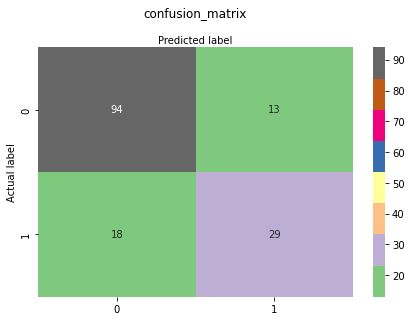

In [82]:
import seaborn as sns
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = "Accent", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('confusion_matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')